In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

# 1

In [299]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header=None)
df.head()#22 параметра, 8124 гриба



,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [300]:
df.shape

(8124, 23)

In [301]:
df[5].value_counts()

n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: 5, dtype: int64

C:\Users\79039\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


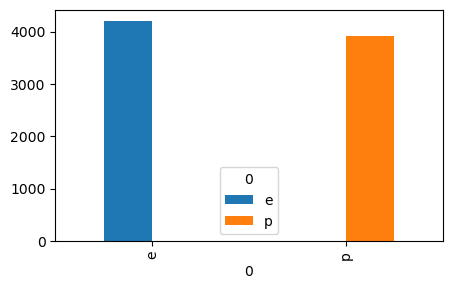

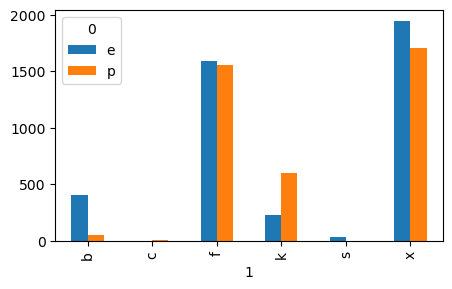

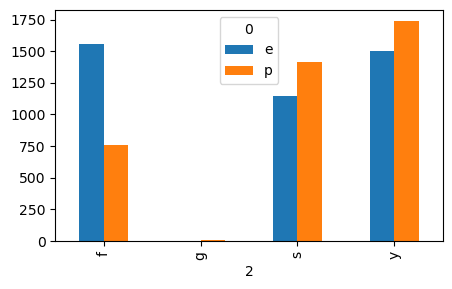

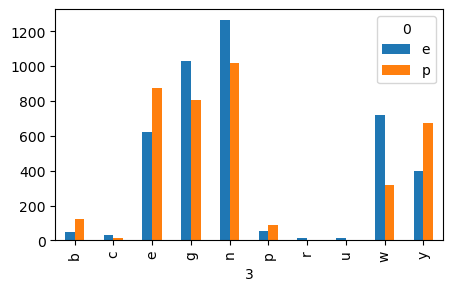

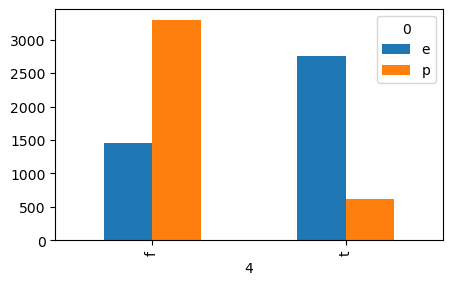

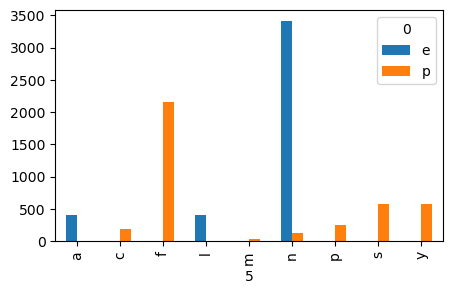

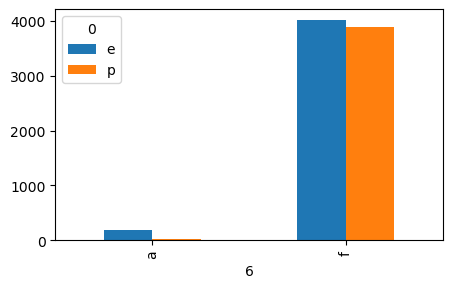

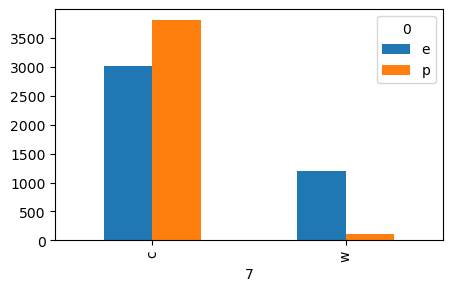

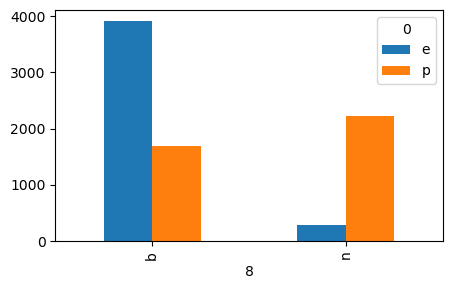

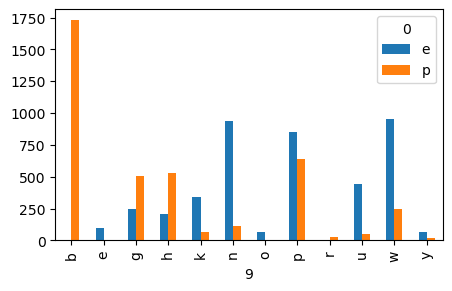

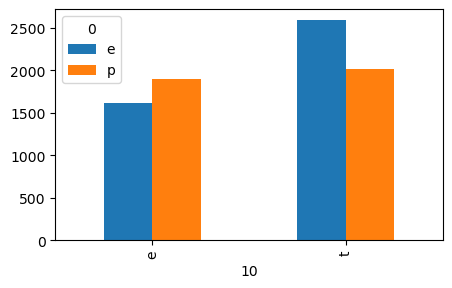

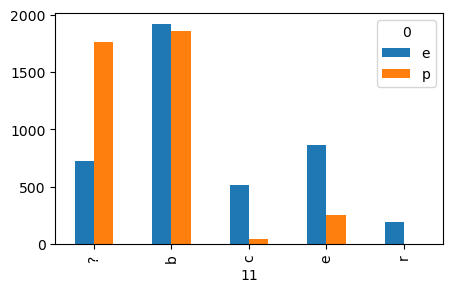

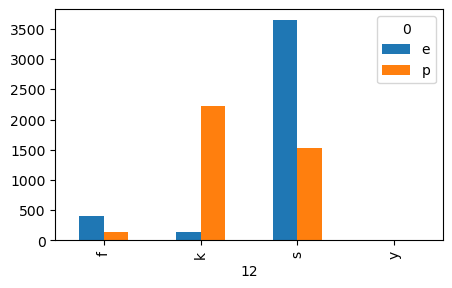

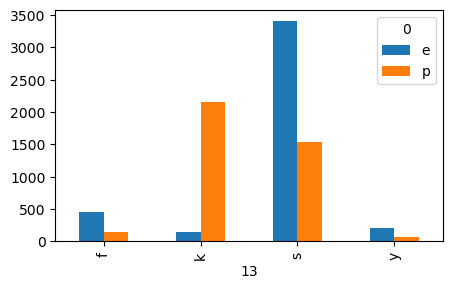

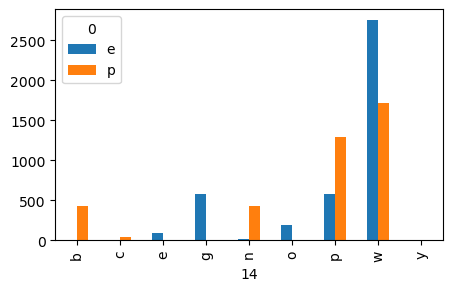

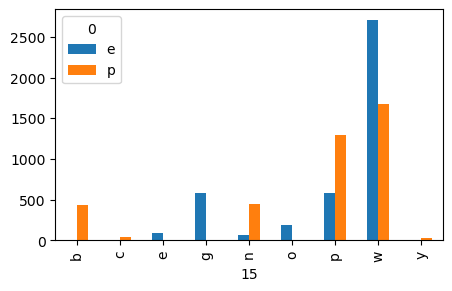

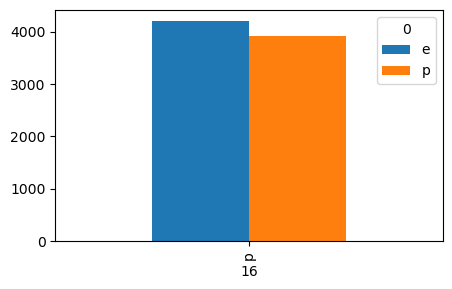

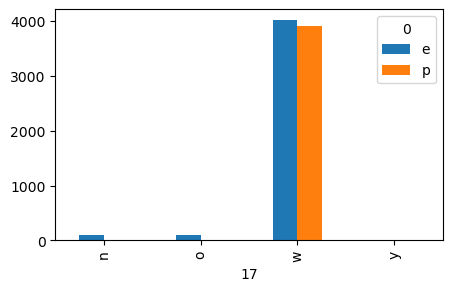

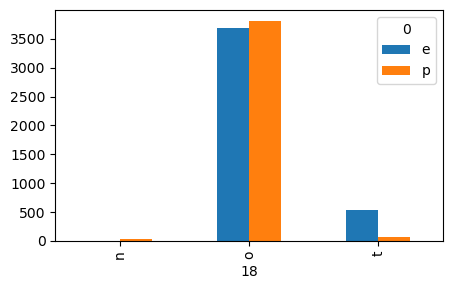

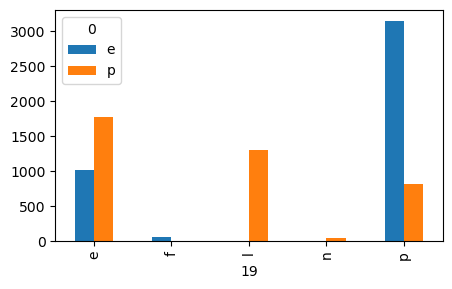

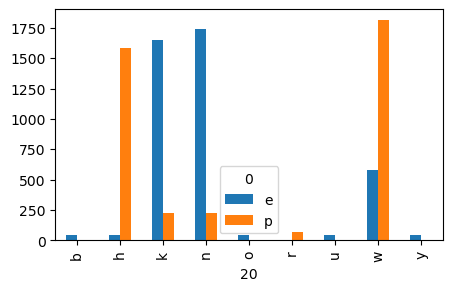

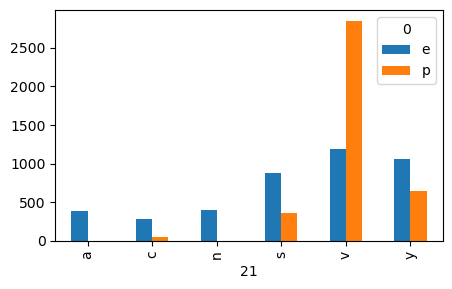

In [302]:
num=22
for n in range(num):
    df.groupby(n)[0].value_counts().unstack().fillna(0).plot.bar(figsize=(5,3))

# 2

In [303]:
cnt = df[0].value_counts()
p0 = cnt['p']/cnt.sum()
z0 = (np.log(p0) - np.log(1.0 - p0))
print(p0,z0) #w0

0.48202855736090594 -0.07191675076714477


In [304]:
df1=df.copy()


In [305]:
df1

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [306]:
sklearn.preprocessing.LabelEncoder()

LabelEncoder()

In [307]:
le =sklearn.preprocessing.LabelEncoder()
for i in range(23):
    df1[i] = le.fit_transform(df1[i])#df1.sklearn.preprocessing.LabelEncoder()
df1

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [258]:
toch = []
resh_fun = []
for i in range(1,23):
    
    f= df1.groupby(i)[0].value_counts().unstack().fillna(0)

    f['prob'+str(i)] = (f[1]+1)/(f[1]+f[0]+2)#f9.sum(axis=1)
        
    df1['prob'+str(i)] = df1[i].map(lambda x: f.at[x,'prob'+str(i)])
    
    
    
    resh_fun.append(1.0/(1.0+np.exp(  sum( 1.0/(1.0+np.exp(df1['prob'+str(i)])  ))**(-1)+z0) ))
    
   
    f['pred%i'%i] = f['prob'+str(i)].map(lambda x: '0' if x<0.5 else '1')
    df1['pred'+str(i)] = df1[i].map(lambda x: f.at[x,'pred'+str(i)])
    
    #определение точности 
    metric = 0
    deli = 8124
    for j in range(8124):
        if int(df1[0][j])==int(df1['pred'+str(i)][j]):
            metric+=1

    toch.append(metric/deli)
    
df1

,0,1,2,3,4,5,6,7,8,9,...,prob18,pred18,prob19,pred19,prob20,pred20,prob21,pred21,prob22,pred22
0,1,5,2,4,1,6,1,0,1,4,...,0.508545,1,0.205793,0,0.120064,0,0.295200,0,0.737838,1
1,0,5,2,9,1,0,1,0,0,4,...,0.508545,1,0.205793,0,0.114213,0,0.002488,0,0.344651,0
2,0,0,2,8,1,3,1,0,0,5,...,0.508545,1,0.205793,0,0.114213,0,0.002488,0,0.125850,0
3,1,5,3,8,1,6,1,0,1,5,...,0.508545,1,0.205793,0,0.120064,0,0.295200,0,0.737838,1
4,0,5,2,3,0,5,1,1,0,4,...,0.508545,1,0.636789,1,0.114213,0,0.002591,0,0.344651,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,0.508545,1,0.205793,0,0.020000,0,0.154971,0,0.711031,1
8120,0,5,2,4,0,5,0,0,0,11,...,0.508545,1,0.205793,0,0.020000,0,0.704849,1,0.711031,1
8121,0,2,2,4,0,5,0,0,0,5,...,0.508545,1,0.205793,0,0.020000,0,0.154971,0,0.711031,1
8122,1,3,3,4,0,8,1,0,1,0,...,0.508545,1,0.636789,1,0.758577,1,0.704849,1,0.711031,1


In [331]:
resh_fun

max(resh_fun)
resh_fun.index(max(resh_fun))
max(resh_fun)

0.5178923137863543

In [332]:
max(toch)
toch.index(max(toch))
max(toch)
#5 - самая информативная переменная!!!

0.9852289512555391

In [262]:
df2 = df1.copy()

# 3

In [263]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [264]:
df_b = df1.iloc[::1,23::2]

In [265]:
y = df1[0]
X = df_b
X

,prob1,prob2,prob3,prob4,prob5,prob6,prob7,prob8,prob9,prob10,...,prob13,prob14,prob15,prob16,prob17,prob18,prob19,prob20,prob21,prob22
0,0.467195,0.552385,0.446632,0.185021,0.996124,0.492547,0.558409,0.885044,0.158537,0.540364,...,0.311260,0.383565,0.383265,0.482033,0.493187,0.508545,0.205793,0.120064,0.295200,0.737838
1,0.467195,0.552385,0.626629,0.185021,0.002488,0.492547,0.558409,0.301568,0.158537,0.540364,...,0.311260,0.383565,0.383265,0.482033,0.493187,0.508545,0.205793,0.114213,0.002488,0.344651
2,0.107930,0.552385,0.308061,0.185021,0.002488,0.492547,0.558409,0.301568,0.107619,0.540364,...,0.311260,0.383565,0.383265,0.482033,0.493187,0.508545,0.205793,0.114213,0.002488,0.125850
3,0.467195,0.536352,0.308061,0.185021,0.996124,0.492547,0.558409,0.885044,0.107619,0.540364,...,0.311260,0.383565,0.383265,0.482033,0.493187,0.508545,0.205793,0.120064,0.295200,0.737838
4,0.467195,0.552385,0.439197,0.693263,0.034278,0.492547,0.085997,0.301568,0.158537,0.437527,...,0.311260,0.383565,0.383265,0.482033,0.493187,0.508545,0.636789,0.114213,0.002591,0.344651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.724096,0.552385,0.446632,0.693263,0.034278,0.089623,0.558409,0.301568,0.261364,0.540364,...,0.311260,0.005155,0.005155,0.482033,0.010204,0.508545,0.205793,0.020000,0.154971,0.711031
8120,0.467195,0.552385,0.446632,0.693263,0.034278,0.089623,0.558409,0.301568,0.261364,0.540364,...,0.311260,0.005155,0.005155,0.482033,0.010204,0.508545,0.205793,0.020000,0.704849,0.711031
8121,0.493659,0.552385,0.446632,0.693263,0.034278,0.089623,0.558409,0.301568,0.107619,0.540364,...,0.311260,0.005155,0.005155,0.482033,0.010204,0.508545,0.205793,0.020000,0.154971,0.711031
8122,0.724096,0.536352,0.446632,0.693263,0.998270,0.492547,0.558409,0.885044,0.999422,0.437527,...,0.937121,0.383565,0.383265,0.482033,0.493187,0.508545,0.636789,0.758577,0.704849,0.711031


In [266]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: 0, Length: 8124, dtype: int32

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [268]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [269]:
print("Неправильно предсказаных из %d : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Неправильно предсказаных из 4062 : 47


# 4

In [270]:
from scipy.stats import norm

In [271]:
y = df1[0]
X = df_b
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()

In [272]:
np.std

<function numpy.std(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>, *, where=<no value>)>

In [273]:
means = X_train.groupby(y_train).apply(np.mean)
stds = X_train.groupby(y_train).apply(np.std)

C:\Users\79039\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\79039\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [274]:
### Вычисляем априорную вероятность класса
probs = X_train.groupby(y_train).apply(lambda x: len(x)) / X_train.shape[0]
 
### Вычисляем вероятность для Теоремы Байеса для каждого элемента
y_pred = []

In [275]:
# каждый элемент в валидационной части данных
for elem in range(X_test.shape[0]):
    p = {}
 
   # для каждого возможного класса
    for cl in np.unique(y_train):

       # априорная вероятность взятого ранее класса
        p[cl] = probs.iloc[cl]

       # для каждого столбца в датасете
        for index, param in enumerate(X_test.iloc[elem]):

           # умножаем вероятность того, что данное значение столбца
           # будет принадлежать распределению для выбранного класса
            p[cl] *= norm.pdf(param, means.iloc[cl, index], stds.iloc[cl, index])
  
    y_pred.append(pd.Series(p).values.argmax())

In [276]:
from sklearn.metrics import accuracy_score

In [277]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9884293451501723

In [278]:
print("Неправильно предсказаных из %d : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Неправильно предсказаных из 4062 : 47


# 5

In [323]:
df3 = df2.iloc[::1,23::2]
df3

,prob1,prob2,prob3,prob4,prob5,prob6,prob7,prob8,prob9,prob10,...,prob13,prob14,prob15,prob16,prob17,prob18,prob19,prob20,prob21,prob22
0,0.467195,0.552385,0.446632,0.185021,0.996124,0.492547,0.558409,0.885044,0.158537,0.540364,...,0.311260,0.383565,0.383265,0.482033,0.493187,0.508545,0.205793,0.120064,0.295200,0.737838
1,0.467195,0.552385,0.626629,0.185021,0.002488,0.492547,0.558409,0.301568,0.158537,0.540364,...,0.311260,0.383565,0.383265,0.482033,0.493187,0.508545,0.205793,0.114213,0.002488,0.344651
2,0.107930,0.552385,0.308061,0.185021,0.002488,0.492547,0.558409,0.301568,0.107619,0.540364,...,0.311260,0.383565,0.383265,0.482033,0.493187,0.508545,0.205793,0.114213,0.002488,0.125850
3,0.467195,0.536352,0.308061,0.185021,0.996124,0.492547,0.558409,0.885044,0.107619,0.540364,...,0.311260,0.383565,0.383265,0.482033,0.493187,0.508545,0.205793,0.120064,0.295200,0.737838
4,0.467195,0.552385,0.439197,0.693263,0.034278,0.492547,0.085997,0.301568,0.158537,0.437527,...,0.311260,0.383565,0.383265,0.482033,0.493187,0.508545,0.636789,0.114213,0.002591,0.344651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.724096,0.552385,0.446632,0.693263,0.034278,0.089623,0.558409,0.301568,0.261364,0.540364,...,0.311260,0.005155,0.005155,0.482033,0.010204,0.508545,0.205793,0.020000,0.154971,0.711031
8120,0.467195,0.552385,0.446632,0.693263,0.034278,0.089623,0.558409,0.301568,0.261364,0.540364,...,0.311260,0.005155,0.005155,0.482033,0.010204,0.508545,0.205793,0.020000,0.704849,0.711031
8121,0.493659,0.552385,0.446632,0.693263,0.034278,0.089623,0.558409,0.301568,0.107619,0.540364,...,0.311260,0.005155,0.005155,0.482033,0.010204,0.508545,0.205793,0.020000,0.154971,0.711031
8122,0.724096,0.536352,0.446632,0.693263,0.998270,0.492547,0.558409,0.885044,0.999422,0.437527,...,0.937121,0.383565,0.383265,0.482033,0.493187,0.508545,0.636789,0.758577,0.704849,0.711031


In [324]:
for i in range(1,23):
    df3['sig'+str(i)] =1.0/(1.0+np.exp((p0*(df3['prob'+str(i)])+z0)))

In [325]:
df3

,prob1,prob2,prob3,prob4,prob5,prob6,prob7,prob8,prob9,prob10,...,sig13,sig14,sig15,sig16,sig17,sig18,sig19,sig20,sig21,sig22
0,0.467195,0.552385,0.446632,0.185021,0.996124,0.492547,0.558409,0.885044,0.158537,0.540364,...,0.480480,0.471787,0.471823,0.459977,0.458641,0.456804,0.493180,0.503511,0.482413,0.429537
1,0.467195,0.552385,0.626629,0.185021,0.002488,0.492547,0.558409,0.301568,0.158537,0.540364,...,0.480480,0.471787,0.471823,0.459977,0.458641,0.456804,0.493180,0.504216,0.517672,0.476464
2,0.107930,0.552385,0.308061,0.185021,0.002488,0.492547,0.558409,0.301568,0.107619,0.540364,...,0.480480,0.471787,0.471823,0.459977,0.458641,0.456804,0.493180,0.504216,0.517672,0.502813
3,0.467195,0.536352,0.308061,0.185021,0.996124,0.492547,0.558409,0.885044,0.107619,0.540364,...,0.480480,0.471787,0.471823,0.459977,0.458641,0.456804,0.493180,0.503511,0.482413,0.429537
4,0.467195,0.552385,0.439197,0.693263,0.034278,0.492547,0.085997,0.301568,0.158537,0.437527,...,0.480480,0.471787,0.471823,0.459977,0.458641,0.456804,0.441511,0.504216,0.517660,0.476464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.724096,0.552385,0.446632,0.693263,0.034278,0.089623,0.558409,0.301568,0.261364,0.540364,...,0.480480,0.517351,0.517351,0.459977,0.516743,0.456804,0.493180,0.515564,0.499304,0.432706
8120,0.467195,0.552385,0.446632,0.693263,0.034278,0.089623,0.558409,0.301568,0.261364,0.540364,...,0.480480,0.517351,0.517351,0.459977,0.516743,0.456804,0.493180,0.515564,0.433437,0.432706
8121,0.493659,0.552385,0.446632,0.693263,0.034278,0.089623,0.558409,0.301568,0.107619,0.540364,...,0.480480,0.517351,0.517351,0.459977,0.516743,0.456804,0.493180,0.515564,0.499304,0.432706
8122,0.724096,0.536352,0.446632,0.693263,0.998270,0.492547,0.558409,0.885044,0.999422,0.437527,...,0.406175,0.471787,0.471823,0.459977,0.458641,0.456804,0.441511,0.427089,0.433437,0.432706


In [326]:
tr= df3.iloc[::1,22::]
tr

,sig1,sig2,sig3,sig4,sig5,sig6,sig7,sig8,sig9,sig10,...,sig13,sig14,sig15,sig16,sig17,sig18,sig19,sig20,sig21,sig22
0,0.461754,0.451565,0.464218,0.495683,0.399333,0.458718,0.450846,0.412243,0.498874,0.453001,...,0.480480,0.471787,0.471823,0.459977,0.458641,0.456804,0.493180,0.503511,0.482413,0.429537
1,0.461754,0.451565,0.442718,0.495683,0.517672,0.458718,0.450846,0.481646,0.498874,0.453001,...,0.480480,0.471787,0.471823,0.459977,0.458641,0.456804,0.493180,0.504216,0.517672,0.476464
2,0.504973,0.451565,0.480865,0.495683,0.517672,0.458718,0.450846,0.481646,0.505010,0.453001,...,0.480480,0.471787,0.471823,0.459977,0.458641,0.456804,0.493180,0.504216,0.517672,0.502813
3,0.461754,0.453480,0.480865,0.495683,0.399333,0.458718,0.450846,0.412243,0.505010,0.453001,...,0.480480,0.471787,0.471823,0.459977,0.458641,0.456804,0.493180,0.503511,0.482413,0.429537
4,0.461754,0.451565,0.465110,0.434809,0.513845,0.458718,0.507615,0.481646,0.498874,0.465310,...,0.480480,0.471787,0.471823,0.459977,0.458641,0.456804,0.441511,0.504216,0.517660,0.476464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.431160,0.451565,0.464218,0.434809,0.513845,0.507179,0.450846,0.481646,0.486486,0.453001,...,0.480480,0.517351,0.517351,0.459977,0.516743,0.456804,0.493180,0.515564,0.499304,0.432706
8120,0.461754,0.451565,0.464218,0.434809,0.513845,0.507179,0.450846,0.481646,0.486486,0.453001,...,0.480480,0.517351,0.517351,0.459977,0.516743,0.456804,0.493180,0.515564,0.433437,0.432706
8121,0.458585,0.451565,0.464218,0.434809,0.513845,0.507179,0.450846,0.481646,0.505010,0.453001,...,0.480480,0.517351,0.517351,0.459977,0.516743,0.456804,0.493180,0.515564,0.499304,0.432706
8122,0.431160,0.453480,0.464218,0.434809,0.399085,0.458718,0.450846,0.412243,0.398952,0.465310,...,0.406175,0.471787,0.471823,0.459977,0.458641,0.456804,0.441511,0.427089,0.433437,0.432706


In [327]:
for i in range(1,23):
    tr['pred%i'%i] = tr['sig'+str(i)].map(lambda x: '0' if x<0.5 else '1')

In [328]:
tr

,sig1,sig2,sig3,sig4,sig5,sig6,sig7,sig8,sig9,sig10,...,pred13,pred14,pred15,pred16,pred17,pred18,pred19,pred20,pred21,pred22
0,0.461754,0.451565,0.464218,0.495683,0.399333,0.458718,0.450846,0.412243,0.498874,0.453001,...,0,0,0,0,0,0,0,1,0,0
1,0.461754,0.451565,0.442718,0.495683,0.517672,0.458718,0.450846,0.481646,0.498874,0.453001,...,0,0,0,0,0,0,0,1,1,0
2,0.504973,0.451565,0.480865,0.495683,0.517672,0.458718,0.450846,0.481646,0.505010,0.453001,...,0,0,0,0,0,0,0,1,1,1
3,0.461754,0.453480,0.480865,0.495683,0.399333,0.458718,0.450846,0.412243,0.505010,0.453001,...,0,0,0,0,0,0,0,1,0,0
4,0.461754,0.451565,0.465110,0.434809,0.513845,0.458718,0.507615,0.481646,0.498874,0.465310,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.431160,0.451565,0.464218,0.434809,0.513845,0.507179,0.450846,0.481646,0.486486,0.453001,...,0,1,1,0,1,0,0,1,0,0
8120,0.461754,0.451565,0.464218,0.434809,0.513845,0.507179,0.450846,0.481646,0.486486,0.453001,...,0,1,1,0,1,0,0,1,0,0
8121,0.458585,0.451565,0.464218,0.434809,0.513845,0.507179,0.450846,0.481646,0.505010,0.453001,...,0,1,1,0,1,0,0,1,0,0
8122,0.431160,0.453480,0.464218,0.434809,0.399085,0.458718,0.450846,0.412243,0.398952,0.465310,...,0,0,0,0,0,0,0,0,0,0


In [329]:
acc=[]
for i in range(1,23):
    metric = 0
    for j in range(1,8124):
        if int(df1[0][j])==int(tr['pred'+str(i)][j]):
            metric+=1
    acc.append(metric/8124)   

3796

In [330]:
acc

[0.47021171836533726,
 0.517971442639094,
 0.5140324963072378,
 0.517971442639094,
 0.014771048744460856,
 0.4965534219596258,
 0.38404726735598227,
 0.517971442639094,
 0.3481043820777942,
 0.517971442639094,
 0.4367306745445593,
 0.517971442639094,
 0.517971442639094,
 0.4116198916789759,
 0.4116198916789759,
 0.517971442639094,
 0.49433776464795665,
 0.46184145741014276,
 0.5120630231413097,
 0.13183161004431315,
 0.42146725750861647,
 0.4672575086164451]